In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import numpy as np
import os
import shutil

In [2]:
stores_pd = pd.read_csv('real_distances/unique_stores.csv')
stores_pd['type'] = 'S'
drops_pd = pd.read_csv('real_distances/unique_drops.csv')
drops_pd['type'] = 'D'
info_pd = pd.concat([stores_pd, drops_pd])
info_pd

,Latitude,Longitude,type
0,22.745049,75.892471,S
1,12.913041,77.683237,S
2,12.914264,77.678400,S
3,11.003669,76.976494,S
4,12.972793,80.249982,S
...,...,...,...
4351,25.540377,81.924236,D
4352,23.308998,77.463573,D
4353,30.940184,75.879615,D
4354,30.982872,75.906808,D


In [3]:
def filter_for_label(matrix, labels, i):
    return matrix[np.where(labels == i), :][0]

In [4]:
X = info_pd[['Latitude', 'Longitude']].to_numpy()
dbscan = DBSCAN(eps=.1, min_samples=5)
labels = dbscan.fit_predict(X)

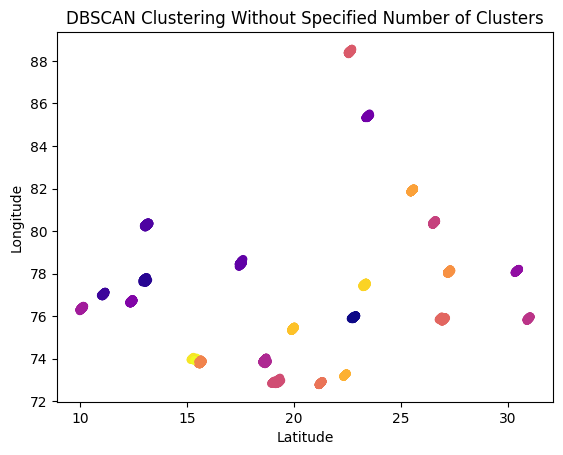

24
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23}


In [5]:
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='plasma', marker='o', edgecolor='none')
plt.title("DBSCAN Clustering Without Specified Number of Clusters")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()
print(len(set(labels)))
print(set(labels))

In [20]:
for i in set(labels):
    count = info_pd.iloc[labels == i]['type'].value_counts()
    demand, store = count['D'], count['S']
    print(f"Cluster #{i}: Demand {demand}. Stores: {store}")

Cluster #0: Demand 220. Stores: 20
Cluster #1: Demand 220. Stores: 20
Cluster #2: Demand 220. Stores: 20
Cluster #3: Demand 220. Stores: 20
Cluster #4: Demand 220. Stores: 20
Cluster #5: Demand 176. Stores: 16
Cluster #6: Demand 209. Stores: 19
Cluster #7: Demand 155. Stores: 13
Cluster #8: Demand 219. Stores: 20
Cluster #9: Demand 220. Stores: 20
Cluster #10: Demand 215. Stores: 18
Cluster #11: Demand 216. Stores: 18
Cluster #12: Demand 220. Stores: 20
Cluster #13: Demand 220. Stores: 20
Cluster #14: Demand 240. Stores: 20
Cluster #15: Demand 220. Stores: 20
Cluster #16: Demand 164. Stores: 15
Cluster #17: Demand 144. Stores: 12
Cluster #18: Demand 178. Stores: 15
Cluster #19: Demand 110. Stores: 10
Cluster #20: Demand 174. Stores: 16
Cluster #21: Demand 154. Stores: 14
Cluster #22: Demand 11. Stores: 1
Cluster #23: Demand 11. Stores: 1


In [37]:
shutil.rmtree('clusters')
os.mkdir('clusters')

for i in set(labels):
    folder_name = f'clusters/{i}'
    os.mkdir(folder_name)
    filtered = info_pd.iloc[labels == i]
    filtered_d = filtered[filtered['type'] == 'D']
    filtered_s = filtered[filtered['type'] == 'S']

    new_df_demand = info_pd.iloc[filtered_d.index].reset_index()[['Latitude', 'Longitude']]
    new_df_stores = info_pd.iloc[filtered_s.index].reset_index()[['Latitude', 'Longitude']]

    new_df_demand.to_csv(f'{folder_name}/demand')
    new_df_stores.to_csv(f'{folder_name}/stores')
